In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from termcolor import colored
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams['figure.dpi'] = 70
from sklearn.impute import SimpleImputer
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
csv_file = pd.read_csv('/content/drive/MyDrive/Solar_Internship/train.csv',sep = ',', header='infer')
print(" The Data Imported is :")
csv_file

 The Data Imported is :


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [7]:
missing_count = csv_file.isna().sum()
print(f"Count of Missing Value :\n{missing_count}")

Count of Missing Value :
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [8]:
csv_file=csv_file.dropna()
new_missing_count = csv_file.isna().sum()
print(f"Count of Missing Value :\n{new_missing_count}")

Count of Missing Value :
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [9]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [10]:
# Row,Column :
print(csv_file.shape)
# Row * Column :
print(csv_file.size)


(9789, 18)
176202


In [11]:
csv_file.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [12]:
csv_file.columns = csv_file.columns.str.lower().str.replace("-", "_").str.replace(" ", "_")
print(csv_file.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales'],
      dtype='object')


In [13]:
# Count of Duplicated Rows :
csv_file.duplicated().sum()

0

In [14]:
#  Coverted Order date and ship date in proper format
# Also converted postal code in int format as float value not needed in postal code
csv_file.order_date = pd.to_datetime(csv_file.order_date)
csv_file.ship_date = pd.to_datetime(csv_file.ship_date)
csv_file.postal_code = csv_file.postal_code.astype(int)
csv_file.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
dtype: object

(0.0, 500.0)

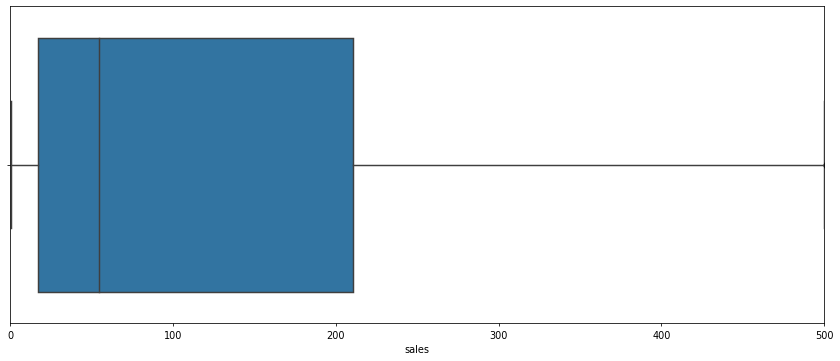

In [15]:
# Sales data plot , it show what amount does sales generally take place 
sns.boxplot(csv_file.sales)
plt.xlim(0, 500)

(0.0, 500.0)

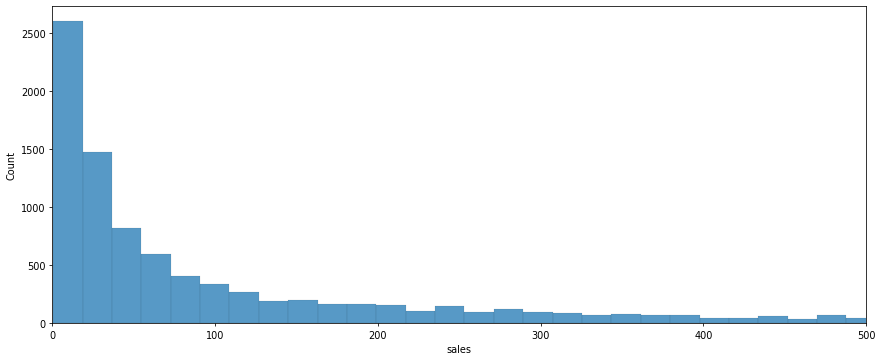

In [16]:
sns.histplot(csv_file.sales);
plt.xlim(0,500)

In [17]:
# By this we found total number of different customers
csv_file.customer_name.value_counts()

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Anthony O'Donnell       1
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Name: customer_name, Length: 793, dtype: int64

In [18]:
# By this we get to know about our most frequent or most profitable customer
csv_file.groupby("customer_name").sales.sum().sort_values(ascending = False)

customer_name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Mitch Gastineau       16.739
Carl Jackson          16.520
Sung Chung            14.112
Lela Donovan           5.304
Thais Sissman          4.833
Name: sales, Length: 793, dtype: float64

Consumer       5096
Corporate      2948
Home Office    1745
Name: segment, dtype: int64


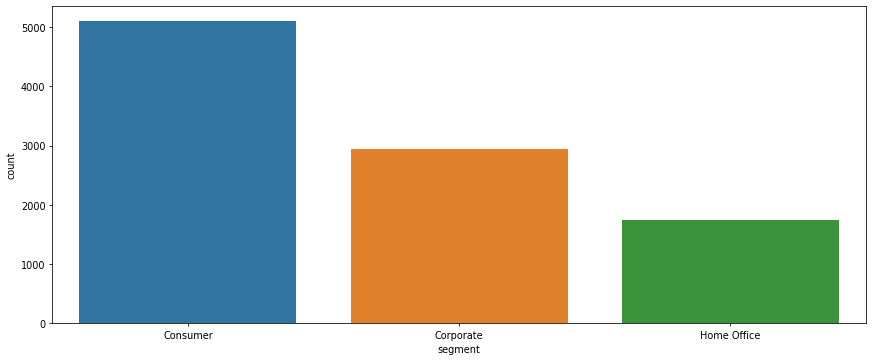

In [19]:
#  By this we found out which segment customer are using the services more
print(csv_file.segment.value_counts())
ax = sns.countplot(csv_file.segment)

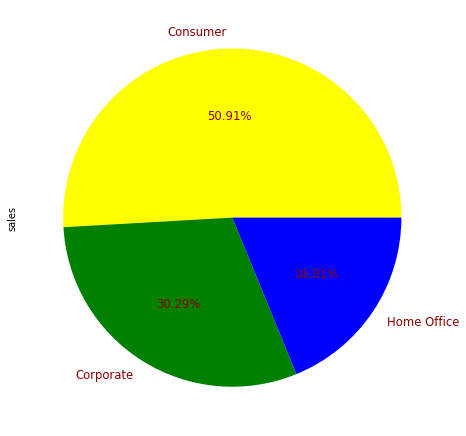

In [20]:
#  Pie char of above data
csv_file.groupby("segment").sales.sum().plot(kind = "pie",autopct = "%.2f%%",colors = ["yellow", "green", "blue"],figsize = (10,8),textprops = {"color" : "darkred","size" : "12"})

In [21]:
# By this we found the given data is only of US
csv_file.country.value_counts()

United States    9789
Name: country, dtype: int64

In [22]:
# By this we found which region of US have more count of value
csv_file.region.value_counts()

West       3140
East       2774
Central    2277
South      1598
Name: region, dtype: int64

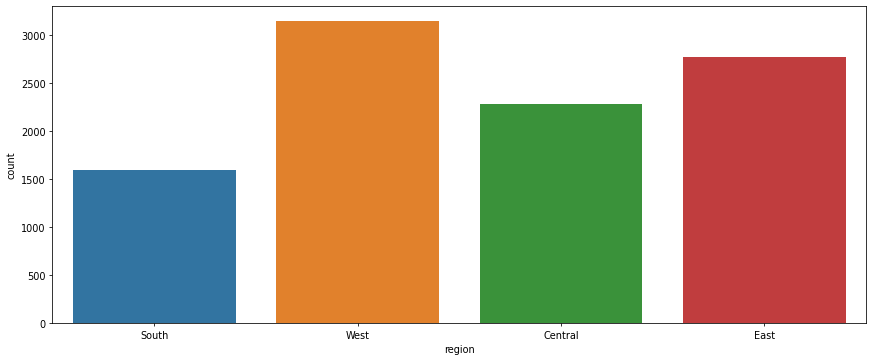

In [23]:
ax = sns.countplot(x = csv_file.region)

In [24]:
# Found sales of each region
csv_file.groupby("region").sales.sum()

region
Central    492646.9132
East       660589.3560
South      389151.4590
West       710219.6845
Name: sales, dtype: float64

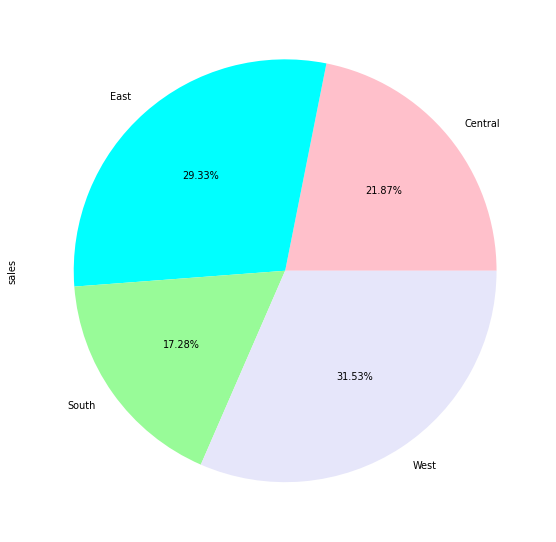

In [25]:
csv_file.groupby("region").sales.sum().plot(kind = "pie",colors = ["pink", "cyan", "palegreen", "lavender"],figsize = (12,10),autopct = "%.2f%%");

In [26]:
#  Used to list different state of US where sales are happening and how much
csv_file.state.value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [27]:
# This will state where most revenue is coming from in decreasing order
state_sale=csv_file.groupby("state").sales.sum().sort_values(ascending = False)
print(state_sale)

state
California              446306.4635
New York                306361.1470
Texas                   168572.5322
Washington              135206.8500
Pennsylvania            116276.6500
Florida                  88436.5320
Illinois                 79236.5170
Michigan                 76136.0740
Ohio                     75130.3500
Virginia                 70636.7200
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48219.1100
Kentucky                 36458.3900
Arizona                  35272.6570
New Jersey               34610.9720
Colorado                 31841.5980
Wisconsin                31173.4300
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27322.9990
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

In [28]:
#  Used to list different city of US where sales are happening and how much
csv_file.city.value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: city, Length: 529, dtype: int64

In [29]:
# This will city where most revenue is coming from in decreasing order
csv_file.groupby("city").sales.sum().sort_values(ascending = False)

city
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: sales, Length: 529, dtype: float64

In [30]:
# This will help to understand which product is generating most revenue
csv_file.groupby("product_name").sales.sum().sort_values(ascending = False)

product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
                                                                                 ...    
Acme Serrated Blade Letter Opener                                                  7.632
Grip Seal Envelopes                                                                7.072
Xerox 20                                                                           6.480
Avery 5                                                                            5.760
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   1.624
Name: sa

In [31]:
csv_file["order_date_year"] = csv_file.order_date.dt.year
csv_file["order_date_month"] = csv_file.order_date.dt.month
# print(csv_file["order_date_year"])
# print(csv_file["order_date_month"])

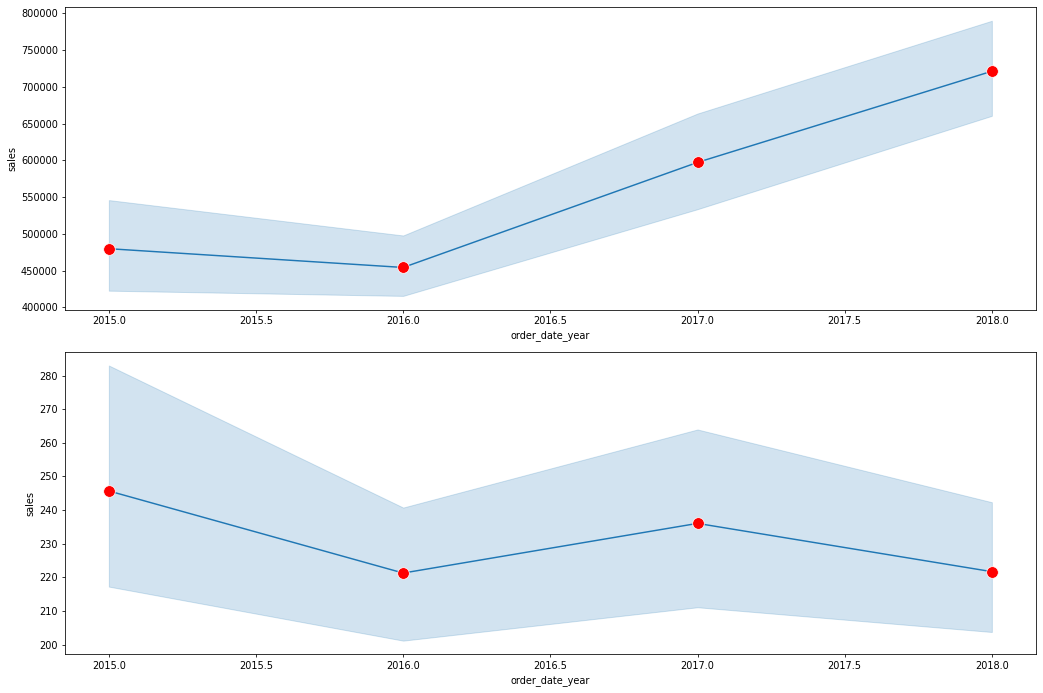

In [32]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

# Total Sales by year
sns.lineplot(x = csv_file.order_date_year, y = csv_file.sales, estimator = np.sum, ax = ax[0], marker = "o", markersize = 12, markerfacecolor = "red")
# Average Sales by year
sns.lineplot(x = csv_file.order_date_year, y = csv_file.sales, ax = ax[1], marker = "o", markersize = 12, markerfacecolor = "red")
plt.tight_layout()

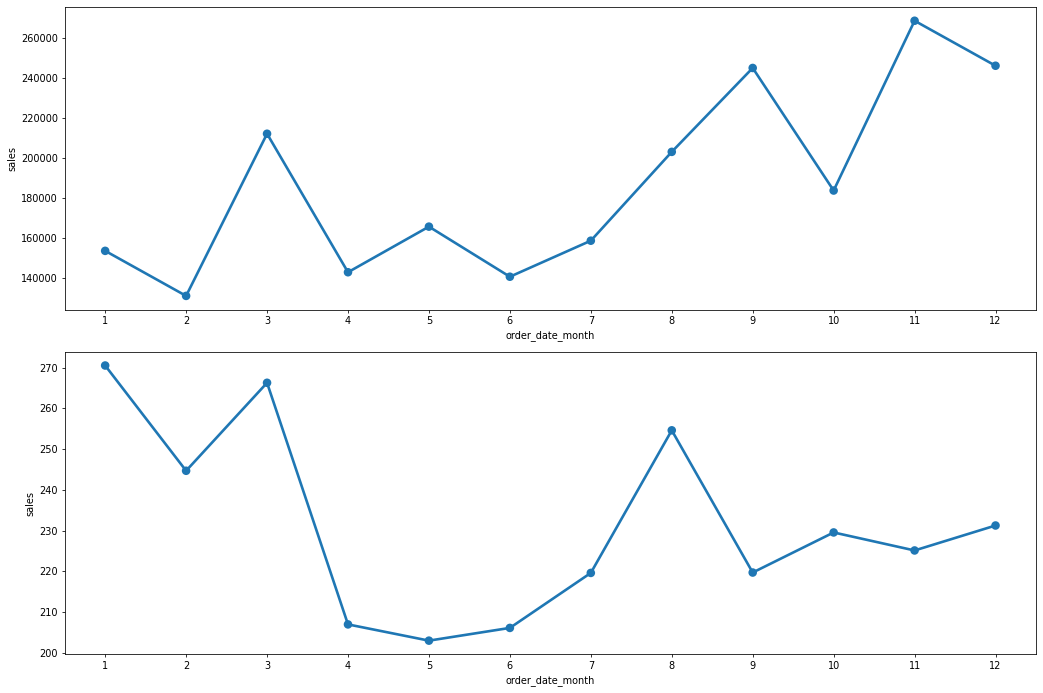

In [33]:
fig, ax = plt.subplots(2,1, figsize = (15,10))
# Total Sales By month 
sns.pointplot(x = csv_file.order_date_month, y = csv_file.sales, ci = None, estimator = np.sum, ax = ax[0])
# Average Sales by month 
sns.pointplot(x = csv_file.order_date_month, y = csv_file.sales, ci = None, ax = ax[1])
plt.tight_layout()

In [34]:
csv_file["ship_date_year"] = csv_file.ship_date.dt.year
csv_file["ship_date_month"] = csv_file.ship_date.dt.month

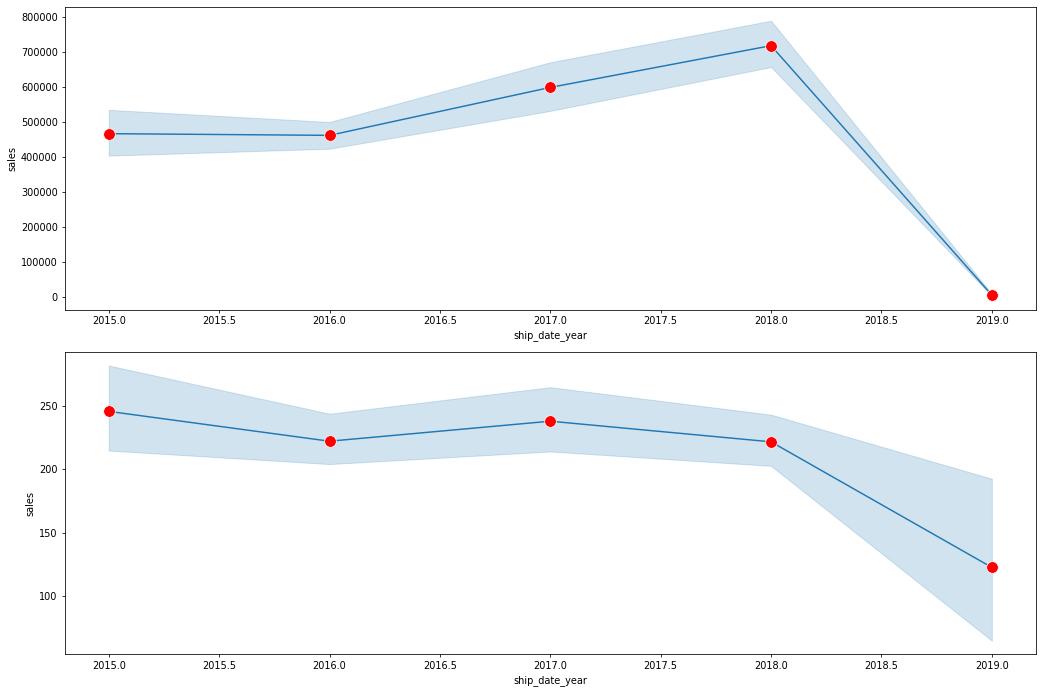

In [35]:
fig, ax = plt.subplots(2,1, figsize = (15,10))
# Total Sales by year by shipping data
sns.lineplot(x = csv_file.ship_date_year, y = csv_file.sales, estimator = np.sum, ax = ax[0], marker = "o", markersize = 12, markerfacecolor = "red")
# Average Sales by year by shipping data
sns.lineplot(x = csv_file.ship_date_year, y = csv_file.sales, ax = ax[1], marker = "o", markersize = 12, markerfacecolor = "red")
plt.tight_layout()

# There is a sudden drop in 2019 as we have data of order date till 2018 and 
# the data of order for 2019 is not given, but the order od 2018 may have reached in 2019 so theere is a sudden dro in the shipment. 

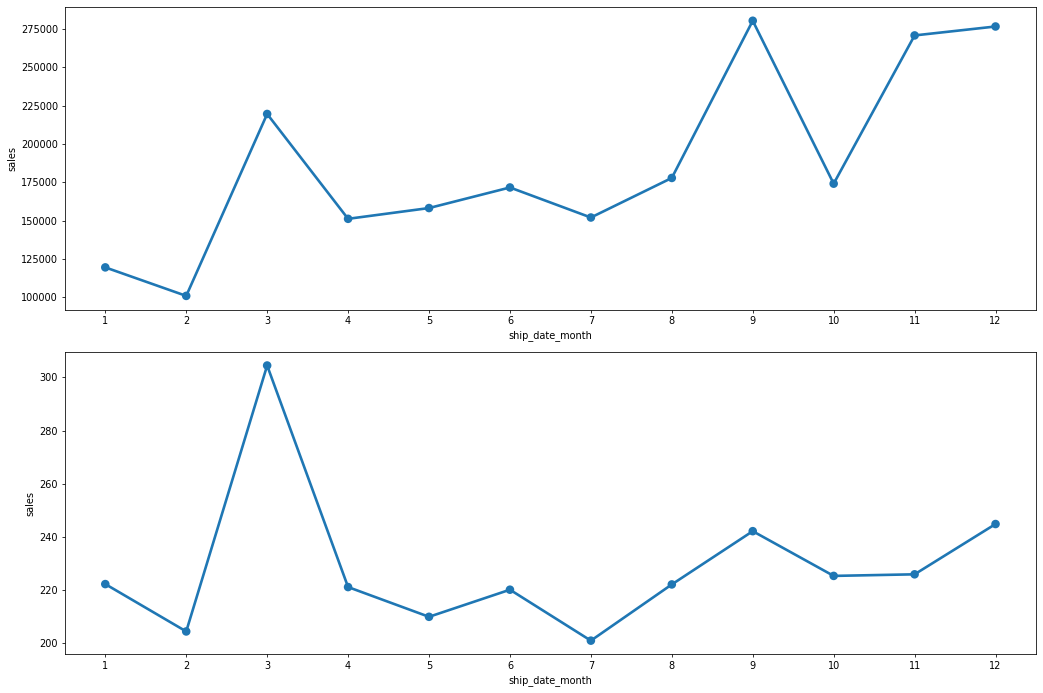

In [38]:
fig, ax = plt.subplots(2,1, figsize = (15,10))
# Total Sales By month by ship data
sns.pointplot(x = csv_file.ship_date_month, y = csv_file.sales, ci = None, estimator = np.sum, ax = ax[0])
# Average Sales by month by ship data
sns.pointplot(x = csv_file.ship_date_month, y = csv_file.sales, ci = None, ax = ax[1])
plt.tight_layout()

In [39]:
# This will tell us about the different mode used for shipping and which mode is used most
csv_file.ship_mode.value_counts()

Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: ship_mode, dtype: int64

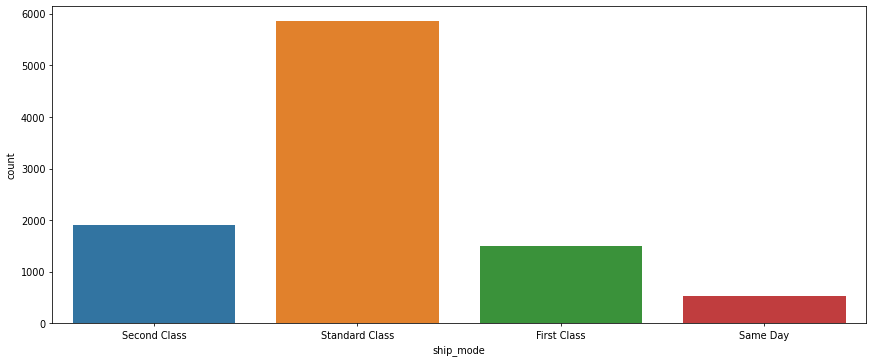

In [41]:
ax = sns.countplot(x = csv_file.ship_mode)

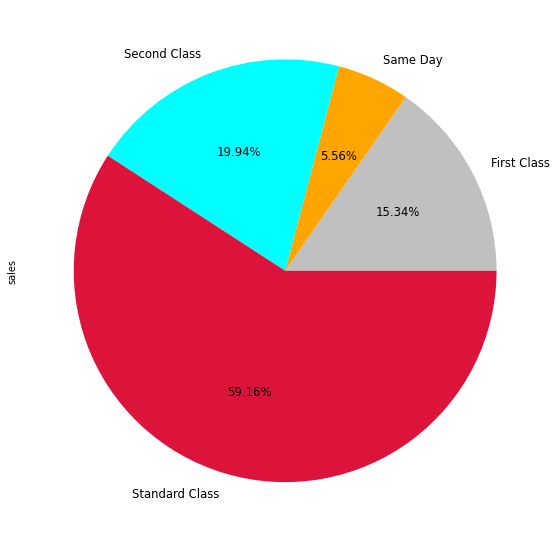

In [42]:
csv_file.groupby("ship_mode").sales.sum().plot(kind = "pie",colors = ["silver", "orange", "aqua", "crimson"],figsize = (12,10),autopct = "%.2f%%",fontsize = 12);

In [47]:
# This will tell us about different category used 

csv_file.category.value_counts()

Office Supplies    5903
Furniture          2076
Technology         1810
Name: category, dtype: int64

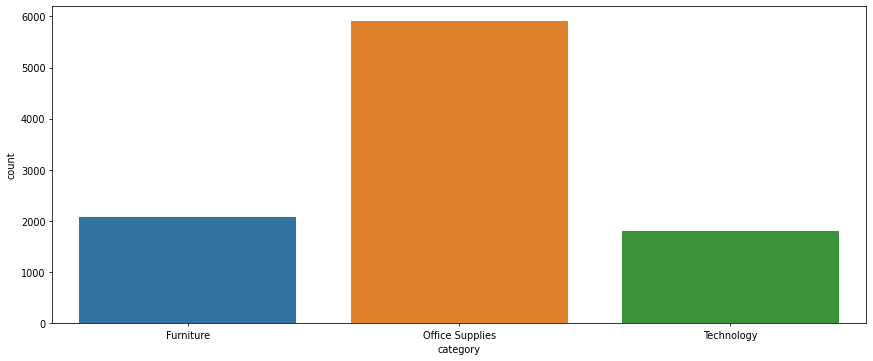

In [48]:
ax = sns.countplot(x = csv_file.category)

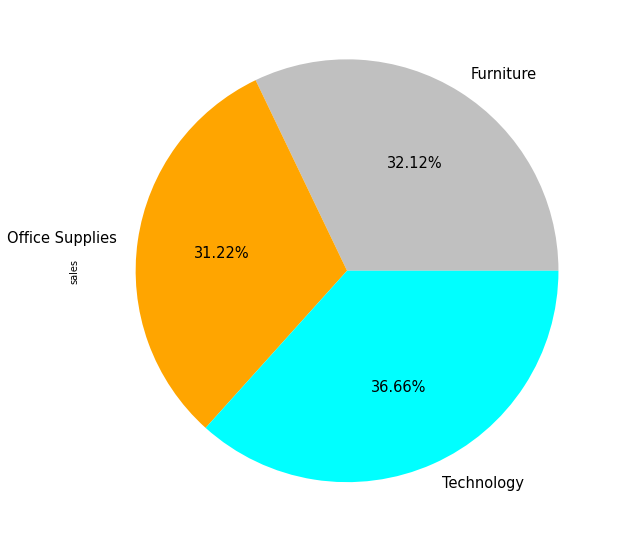

In [49]:
csv_file.groupby("category").sales.sum().plot(kind = "pie",colors = ["silver", "orange", "aqua"],figsize = (12,10),autopct = "%.2f%%",fontsize = 15);

In [50]:
csv_file_furniture = csv_file[csv_file.category == "Furniture"]
csv_file_furniture.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,order_date_year,order_date_month,ship_date_year,ship_date_month
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,2017,11
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,2017,11
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,2016,10
5,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,2015,9,2015,6
10,11,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,2015,9,2015,6


In [52]:
csv_file_furniture.shape

(2076, 22)

In [53]:
# Counting the sub category in category furniture
csv_file_furniture.sub_category.value_counts()

Furnishings    931
Chairs         606
Tables         314
Bookcases      225
Name: sub_category, dtype: int64

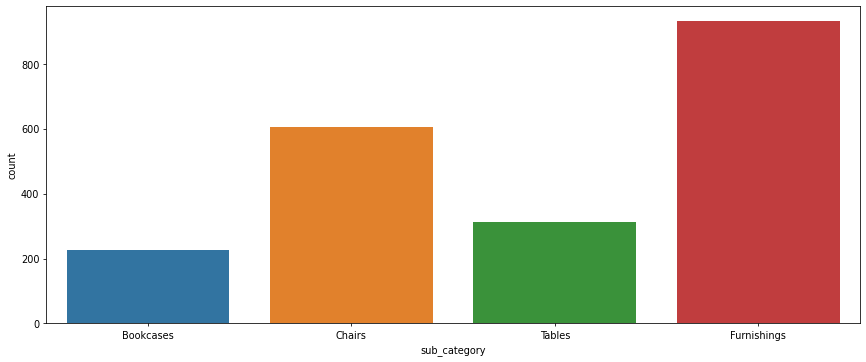

In [54]:
ax = sns.countplot(x = csv_file_furniture.sub_category)

In [55]:
csv_file_furniture.groupby("sub_category").sales.sum()

sub_category
Bookcases      109408.2987
Chairs         322107.5310
Furnishings     89212.0180
Tables         202810.6280
Name: sales, dtype: float64

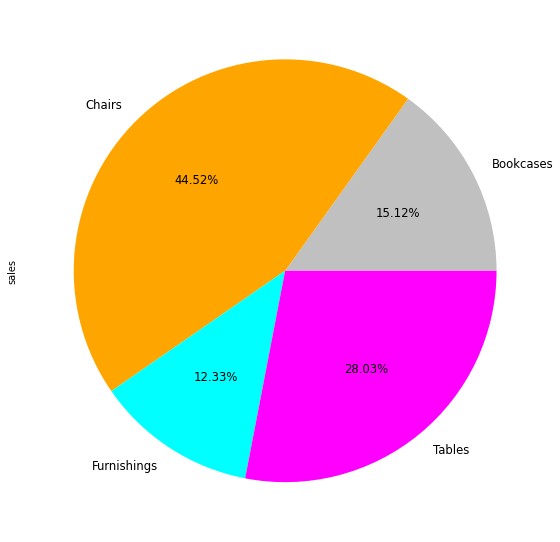

In [56]:
# Revenue generated from different sub category of Furniture
csv_file_furniture.groupby("sub_category").sales.sum().plot(kind = "pie",colors = ["silver", "orange", "aqua", "magenta"],figsize = (12,10),autopct = "%.2f%%", fontsize = 12);

In [57]:
csv_file_office = csv_file[csv_file.category == "Office Supplies"]
csv_file_office.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,order_date_year,order_date_month,ship_date_year,ship_date_month
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2017,12,2017,6
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2016,11,2016,10
6,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,2015,9,2015,6
8,9,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,2015,9,2015,6
9,10,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,2015,9,2015,6


In [58]:
print(csv_file_office.shape)
print(csv_file_office.sub_category.value_counts())

(5903, 22)
Binders       1492
Paper         1336
Storage        831
Art            784
Appliances     458
Labels         357
Envelopes      247
Fasteners      214
Supplies       184
Name: sub_category, dtype: int64


In [59]:
# Revenue from different sub category of office products
csv_file_office.groupby("sub_category").sales.sum().sort_values()

sub_category
Fasteners       3001.960
Labels         12347.726
Envelopes      16126.006
Art            26697.370
Supplies       46420.308
Paper          76736.104
Appliances    104075.463
Binders       200028.785
Storage       217779.102
Name: sales, dtype: float64

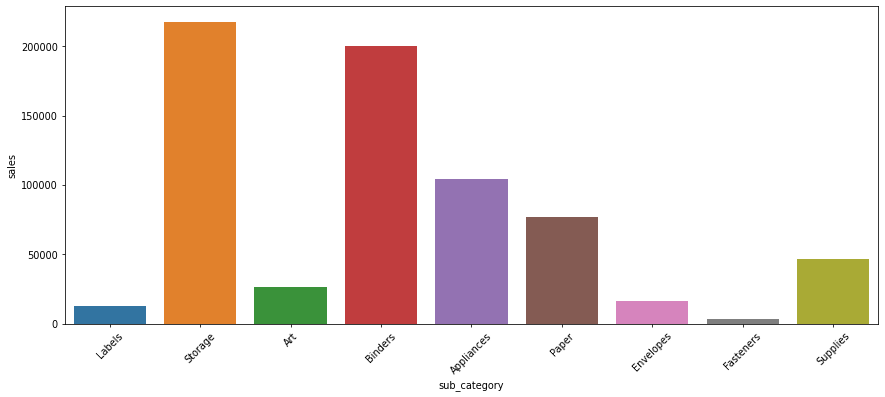

In [61]:
ax = sns.barplot(x = csv_file_office.sub_category, y = csv_file_office.sales, estimator=np.sum, ci = None)
plt.xticks(rotation = 45);

In [62]:
csv_file_tech = csv_file[csv_file.category == "Technology"]
csv_file_tech.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,order_date_year,order_date_month,ship_date_year,ship_date_month
7,8,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,2015,9,2015,6
11,12,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,2015,9,2015,6
19,20,CA-2015-143336,2015-08-27,2015-01-09,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,2015,8,2015,1
26,27,CA-2017-121755,2017-01-16,2017-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,2017,1,2017,1
35,36,CA-2017-117590,2017-08-12,2017-10-12,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,2017,8,2017,10


In [64]:
print(csv_file_tech.shape)
print(csv_file_tech.sub_category.value_counts())

(1810, 22)
Phones         875
Accessories    754
Machines       115
Copiers         66
Name: sub_category, dtype: int64


In [65]:
# Revenue from sub category of
csv_file_tech.groupby("sub_category").sales.sum().sort_values()

sub_category
Copiers        146248.094
Accessories    163881.690
Machines       189238.631
Phones         326487.698
Name: sales, dtype: float64

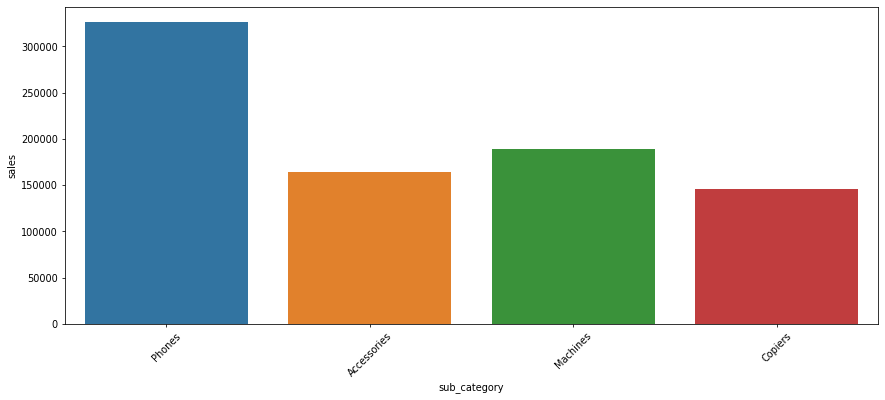

In [66]:
ax = sns.barplot(x = csv_file_tech.sub_category, y = csv_file_tech.sales, estimator=np.sum, ci = None)
plt.xticks(rotation = 45);